# **Лабораторна робота 6: Пошук аномалій та вирішення задачі *anomaly detection* за допомогою бібліотек `scikit-learn`та `PyTorch`**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

### Мета роботи:
Ознайомитися з основними методами виявлення аномалій, навчитися використовувати бібліотеки `scikit-learn` та `PyTorch` для реалізації алгоритмів пошуку аномалій, проаналізувати ефективність різних методів на реальних наборах даних з Kaggle.


### Опис завдання:

1. **Постановка задачі**:
   Використовуючи один із доступних наборів даних Kaggle (наприклад, *Credit Card Fraud Detection*, *Network Intrusion*, або інші), вам потрібно розв'язати задачу виявлення аномалій. Основна мета — ідентифікувати аномальні записи серед нормальних. Вибраний набір даних повинен містити мітки аномалій для перевірки результатів.

2. **Етапи виконання завдання**:
   - Завантажте та підготуйте набір даних.
   - Проведіть попередню обробку даних (масштабування, заповнення пропущених значень, видалення нерелевантних ознак).
   - Використайте різні методи виявлення аномалій:
     - **Методи з бібліотеки scikit-learn**:
       - Isolation Forest
       - One-Class SVM
       - Local Outlier Factor (LOF)
     - **Методи з використанням PyTorch**:
       - Автоенкодери для виявлення аномалій.
   - Порівняйте отримані результати, обчисліть метрики якості (Precision, Recall, F1-Score).
   - Оцініть, який метод найкраще підходить для вирішення задачі на вашому наборі даних.

### Покрокова інструкція

1. **Підготовка середовища**:
   - Встановіть необхідні бібліотеки:
     ```
     pip install scikit-learn torch pandas numpy matplotlib
     ```

2. **Вибір набору даних з Kaggle**:
   Зареєструйтесь на Kaggle та оберіть один із наборів даних для виявлення аномалій. Наприклад:
   - [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)
   - [Network Intrusion Detection](https://www.kaggle.com/xyuanh/benchmarking-datasets)

3. **Попередня обробка даних**:
   - Завантажте дані та проведіть їхню початкову обробку.
   - Масштабуйте ознаки за допомогою `StandardScaler` або `MinMaxScaler`.
   - Розділіть дані на навчальну і тестову вибірки.

4. **Методи з бібліотеки `scikit-learn`**:

   - **Isolation Forest**:
     ```
     from sklearn.ensemble import IsolationForest
     ```

   - **One-Class SVM**:
     ```
     from sklearn.svm import OneClassSVM
     ```

   - **Local Outlier Factor**:
     ```
     from sklearn.neighbors import LocalOutlierFactor
     ```

5. **Методи на основі нейронних мереж (PyTorch)**:

   Використайте автоенкодер для пошуку аномалій. Побудуйте нейронну мережу з енкодером і декодером. Під час навчання порівняйте відновлені дані з вхідними та обчисліть помилку. Записи з великою помилкою можуть бути аномаліями.

   - **Реалізація автоенкодера**:
     ```
     import torch
     import torch.nn as nn
     import torch.optim as optim
     ```

6. **Оцінка результатів**:
   Використовуйте метрики оцінки якості:
   - `Precision`, `Recall`, `F1-score`
   ```
   from sklearn.metrics import classification_report
   ```

7. **Звіт**:
   - Поясніть, який метод дав найкращі результати.
   - Проаналізуйте, чому деякі методи працюють краще на вашому наборі даних.
   - Оцініть можливості використання глибоких нейронних мереж (автоенкодерів) для вирішення задачі.


### Результати, які необхідно надати:
1. Код рішення у вигляді Jupyter Notebook з аналізом результатів та поясненнями.


### Дедлайн:
[27 жовтня 23:59]


### Корисні ресурси:
- [Документація PyTorch](https://pytorch.org/docs/stable/index.html)
- [Документація scikit-learn](https://scikit-learn.org/stable/documentation.html)
- [Kaggle Datasets](https://www.kaggle.com/datasets)

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

import warnings
warnings.filterwarnings('ignore')

In [6]:
creditcard_dataset = pd.read_csv("creditcard.csv")

creditcard_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
creditcard_dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
creditcard_dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
creditcard_dataset.drop_duplicates()

creditcard_dataset.shape

(284807, 31)

In [ ]:
scaler = StandardScaler()

X = creditcard_dataset.drop("Class", axis=1)
y = creditcard_dataset["Class"]

X_train_unscaled, x_test_unscaled, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.transform(x_test_unscaled)

In [11]:
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X_train)

y_pred_train = iso_forest.predict(X_train)
y_pred_test = iso_forest.predict(X_test)

y_pred_train = np.where(y_pred_train == 1, 0, 1)
y_pred_test = np.where(y_pred_test == 1, 0, 1)

print(f"Number of anomalies in training data: {np.sum(y_pred_train)}")

print("Classification report for training data: ")
print(classification_report(y_train, y_pred_train))

print(f"Number of anomalies in test data: {np.sum(y_pred_test)}")

print("Classification report for test data: ")
print(classification_report(y_test, y_pred_test))

Number of anomalies in training data: 21361
Classification report for training data: 
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    213226
           1       0.02      0.86      0.03       379

    accuracy                           0.90    213605
   macro avg       0.51      0.88      0.49    213605
weighted avg       1.00      0.90      0.95    213605

Number of anomalies in test data: 7038
Classification report for test data: 
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     71089
           1       0.01      0.89      0.03       113

    accuracy                           0.90     71202
   macro avg       0.51      0.90      0.49     71202
weighted avg       1.00      0.90      0.95     71202



In [12]:
oc_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.1)
oc_svm.fit(X_train)

y_pred_train_svm = oc_svm.predict(X_train)
y_pred_test_svm = oc_svm.predict(X_test)

y_pred_train_svm = np.where(y_pred_train_svm == 1, 0, 1)
y_pred_test_svm = np.where(y_pred_test_svm == 1, 0, 1)

print(f"Number of anomalies in training data: {np.sum(y_pred_train_svm)}")

print("Classification report for training data: ")
print(classification_report(y_train, y_pred_train_svm))

print(f"Number of anomalies in test data: {np.sum(y_pred_test_svm)}")

print("Classification report for test data: ")
print(classification_report(y_test, y_pred_test_svm))

Number of anomalies in training data: 21357
Classification report for training data: 
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    213226
           1       0.02      0.89      0.03       379

    accuracy                           0.90    213605
   macro avg       0.51      0.90      0.49    213605
weighted avg       1.00      0.90      0.95    213605

Number of anomalies in test data: 7055
Classification report for test data: 
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     71089
           1       0.01      0.92      0.03       113

    accuracy                           0.90     71202
   macro avg       0.51      0.91      0.49     71202
weighted avg       1.00      0.90      0.95     71202



In [13]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred_train_lof = lof.fit_predict(X_train)
y_pred_test_lof = lof.fit_predict(X_test)

y_pred_train_lof = np.where(y_pred_train_lof == 1, 0, 1)
y_pred_test_lof = np.where(y_pred_test_lof == 1, 0, 1)

print(f"Number of anomalies in training data: {np.sum(y_pred_train_lof)}")

print("Classification report for training data: ")
print(classification_report(y_train, y_pred_train_lof))

print(f"Number of anomalies in test data: {np.sum(y_pred_test_lof)}")

print("Classification report for test data: ")
print(classification_report(y_test, y_pred_test_lof))

Number of anomalies in training data: 21361
Classification report for training data: 
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    213226
           1       0.00      0.15      0.01       379

    accuracy                           0.90    213605
   macro avg       0.50      0.52      0.48    213605
weighted avg       1.00      0.90      0.94    213605

Number of anomalies in test data: 7121
Classification report for test data: 
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     71089
           1       0.00      0.20      0.01       113

    accuracy                           0.90     71202
   macro avg       0.50      0.55      0.48     71202
weighted avg       1.00      0.90      0.95     71202



In [14]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

def plot_anomalies(X_pca, y_pred, model_name):
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_pred, palette={0: 'blue', 1: 'red'}, s=40)
    plt.title(f"Anomalies detected by {model_name}")
    plt.legend(title="0: Regular, 1: Anomaly")
    
    plt.show()

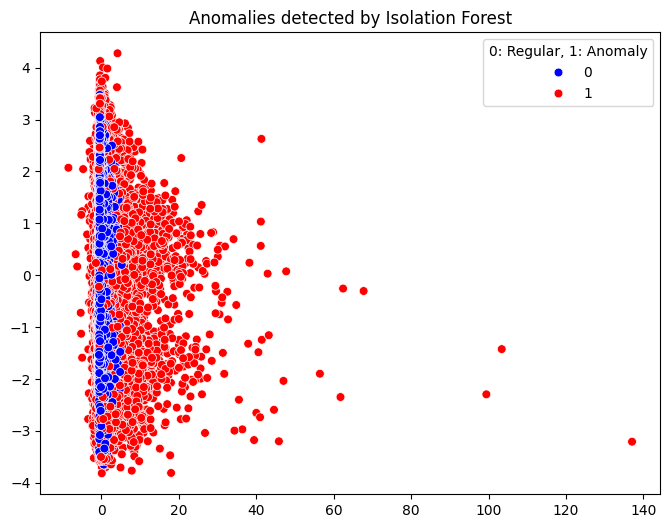

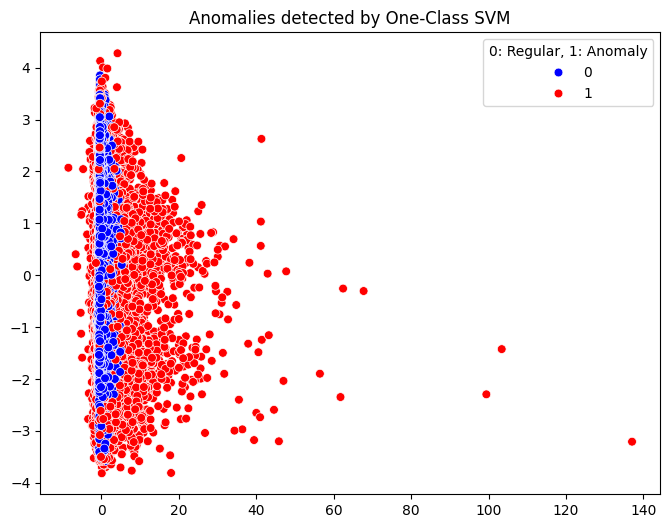

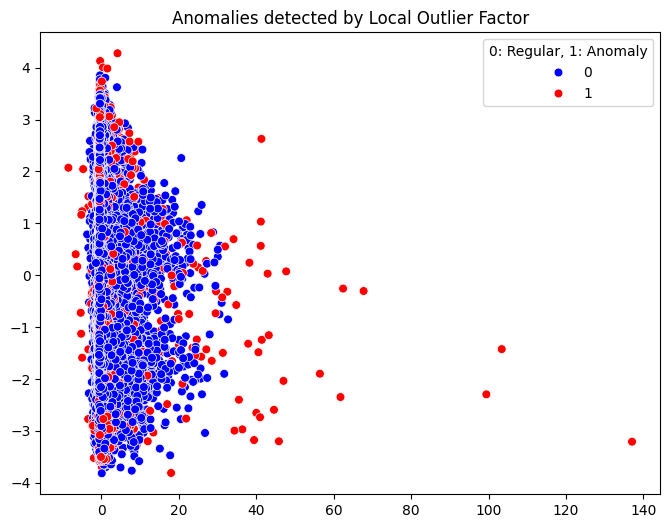

In [15]:
plot_anomalies(X_train_pca, y_pred_train, "Isolation Forest")

plot_anomalies(X_train_pca, y_pred_train_svm, "One-Class SVM")

plot_anomalies(X_train_pca, y_pred_train_lof, "Local Outlier Factor")

Epoch [1/20], Loss: 0.5220
Epoch [2/20], Loss: 0.5269
Epoch [3/20], Loss: 0.5242
Epoch [4/20], Loss: 0.5848
Epoch [5/20], Loss: 0.5532
Epoch [6/20], Loss: 1.1920
Epoch [7/20], Loss: 0.5346
Epoch [8/20], Loss: 0.6651
Epoch [9/20], Loss: 0.9026
Epoch [10/20], Loss: 0.8364
Epoch [11/20], Loss: 0.4439
Epoch [12/20], Loss: 0.7276
Epoch [13/20], Loss: 0.3844
Epoch [14/20], Loss: 0.3371
Epoch [15/20], Loss: 0.6737
Epoch [16/20], Loss: 2.6635
Epoch [17/20], Loss: 0.4055
Epoch [18/20], Loss: 0.7316
Epoch [19/20], Loss: 0.4983
Epoch [20/20], Loss: 0.4077
              precision    recall  f1-score   support

      Normal       1.00      0.95      0.97     71089
     Anomaly       0.03      0.89      0.05       113

    accuracy                           0.95     71202
   macro avg       0.51      0.92      0.51     71202
weighted avg       1.00      0.95      0.97     71202



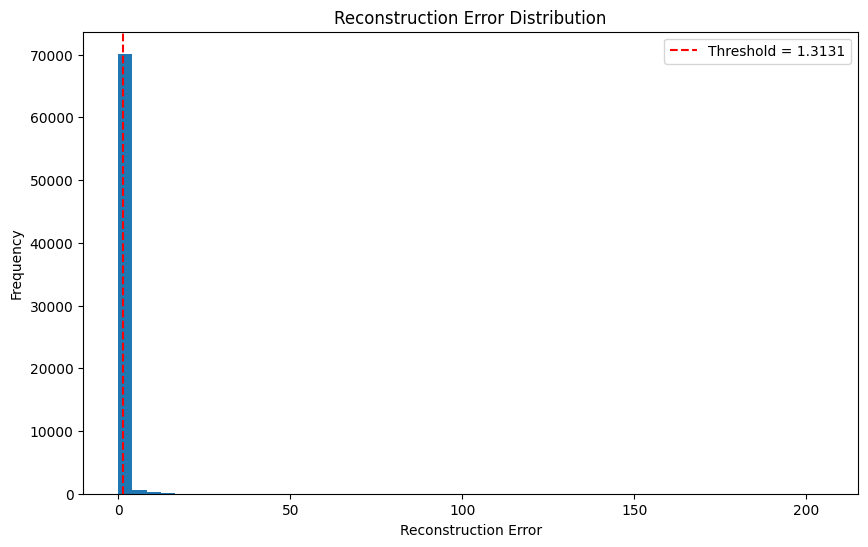

In [18]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128), nn.ReLU(),
            nn.Linear(128, 64), nn.ReLU(),
            nn.Linear(64, 32), nn.ReLU(),
            nn.Linear(32, 16)
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 32), nn.ReLU(),
            nn.Linear(32, 64), nn.ReLU(),
            nn.Linear(64, 128), nn.ReLU(),
            nn.Linear(128, input_dim), nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.decoder(self.encoder(x))

model = Autoencoder(X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    torch.utils.data.TensorDataset(X_train_tensor), batch_size=batch_size, shuffle=True
)

for epoch in range(num_epochs):
    for inputs, in train_loader:
        optimizer.zero_grad()
        loss = criterion(model(inputs), inputs)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

with torch.no_grad():
    reconstruction_error = torch.mean((model(X_test_tensor) - X_test_tensor) ** 2, dim=1)

threshold = np.percentile(reconstruction_error.numpy(), 95)
y_pred = (reconstruction_error.numpy() > threshold).astype(int)

print(classification_report(y_test, y_pred, target_names=['Normal', 'Anomaly']))

plt.figure(figsize=(10, 6))
plt.hist(reconstruction_error.numpy(), bins=50)
plt.axvline(threshold, color='r', linestyle='--', label=f'Threshold = {threshold:.4f}')
plt.title('Reconstruction Error Distribution')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()

plt.show()


-   Було використано три методи для виявлення аномалій у наборі даних `Credit Card Fraud Detection`, а саме: `Isolation Forest`, `One-Class SVM` і `Local Outlier Factor`. 

-   Було використано глибокі нейронні мережі у вигляді автоенкодерів.

-   Моделі були оцінені за метриками `Precision`, `Recall`, `F1-score` та `Classification Report`.

-   Хороші результати у виявленні нормальних клієнтів (клас 0) показали традиційні алгоритми класифікації, а саме високі показники `Precision` і `Recall`. Але точність для класу аномалій (клас 1) залишилася низькою. Незважаючи на високі загальні показники, традиційні моделі не змогли ефективно виявити аномалії.

-   Значно кращі результати показали автоенкодери для виявлення аномалій. Вонм здатні навчатися на нормальних даних, а потім порівнювати відновлені дані з вхідними, що дозволяє їм ідентифікувати аномалії, які мали вищі значення помилки відновлення і підтверджували їх відмінність від нормальних клієнтів.

-   Автоенкодер продемонстрував найкращий результат `F1 Score` (0.97)

-   Глибокі нейронні мережі загалом здатні навчатися на складніших патернах у даних, що робить їх більш ефективними у виявленні аномалій, які можуть бути неочевидними для традиційних моделей.